In [52]:
import numpy as np
import patsy as pt
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 6.0)

In [53]:
x = np.linspace(0,1,100)
data = pd.DataFrame({"x": x})
Z = pt.dmatrix("bs(x,4)", data)
alpha = np.array([0.1, 0.2, -0.3, 0.1, 0.2])

sigma2 = np.exp(np.dot(Z, alpha))

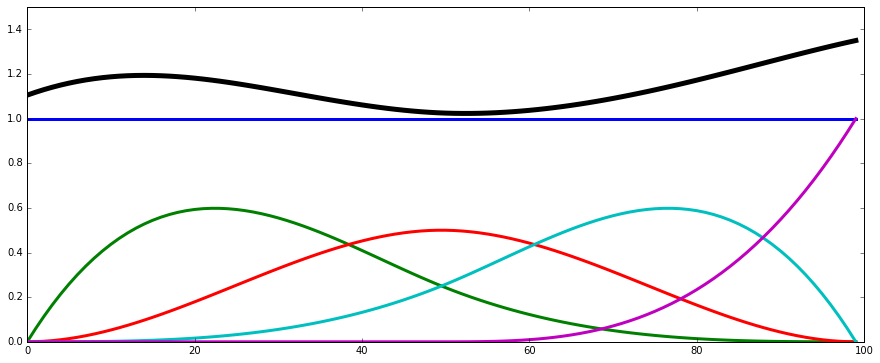

In [54]:
plt.plot(Z, lw=3);
plt.plot(sigma2, 'k', lw=5)
ax = plt.gca()
ax.set_ylim([0, 1.5]);

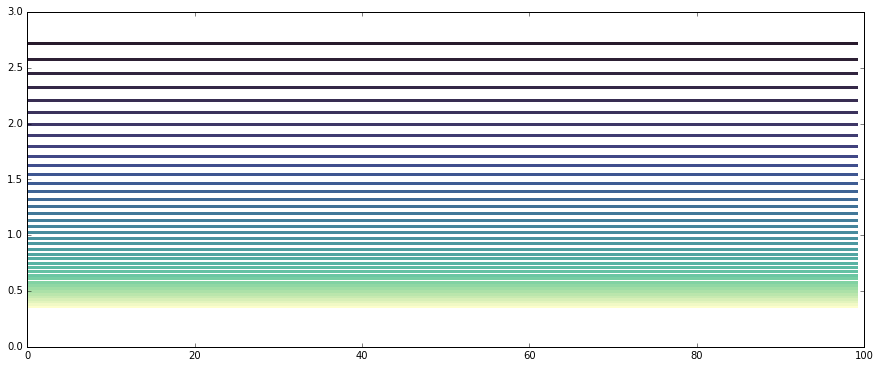

In [55]:
import cmocean

v = np.linspace(-1,1,40)
for i in range(len(v)):
    alpha = np.array([v[i], 0,0,0,0])
    plt.plot(np.exp(np.dot(Z, alpha)), color=cmocean.cm.deep((v[i]+1)*0.5), lw=3)

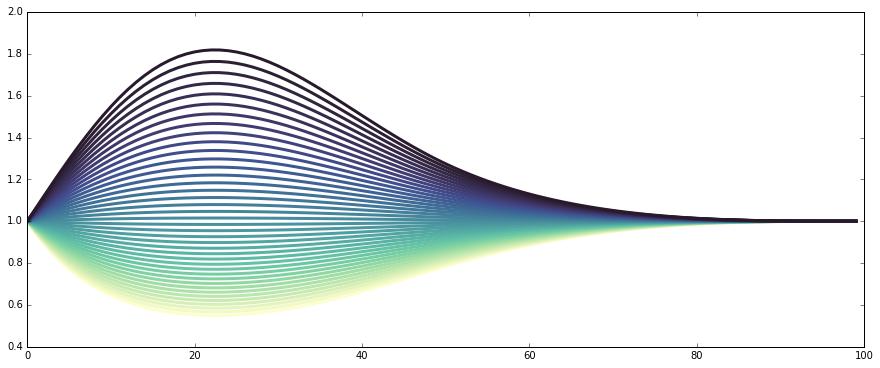

In [5]:
v = np.linspace(-1,1,40)
for i in range(len(v)):
    alpha = np.array([0, v[i], 0,0,0])
    plt.plot(np.exp(np.dot(Z, alpha)), color=cmocean.cm.deep((v[i]+1)*0.5), lw=3)

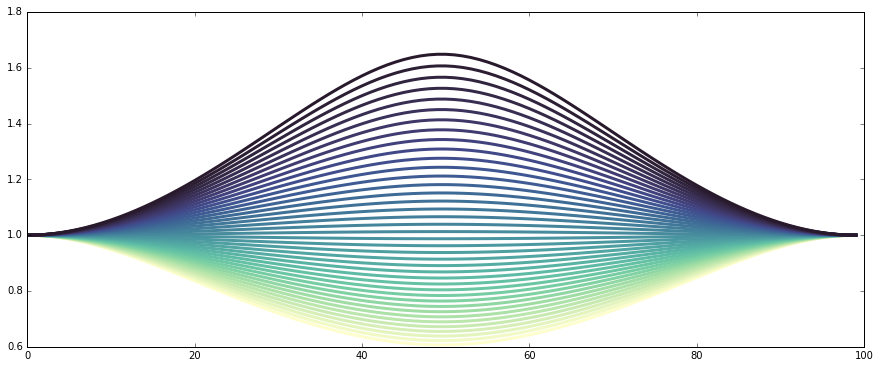

In [6]:
v = np.linspace(-1,1,40)
for i in range(len(v)):
    alpha = np.array([0, 0, v[i], 0, 0])
    plt.plot(np.exp(np.dot(Z, alpha)), color=cmocean.cm.deep((v[i]+1)*0.5), lw=3)

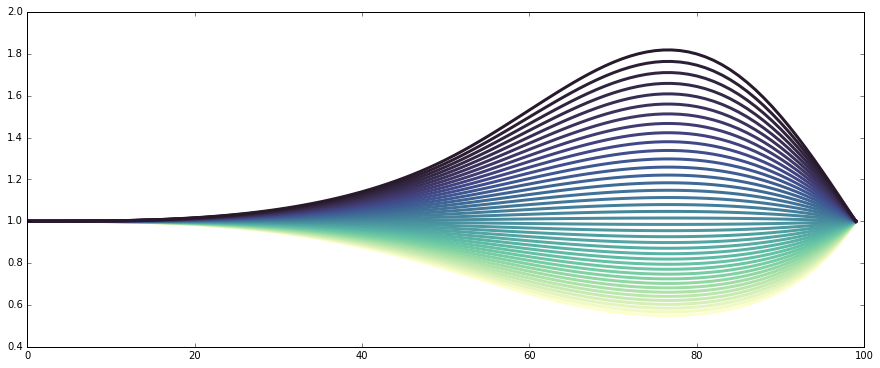

In [7]:
v = np.linspace(-1,1,40)
for i in range(len(v)):
    alpha = np.array([0, 0, 0, v[i], 0])
    plt.plot(np.exp(np.dot(Z, alpha)), color=cmocean.cm.deep((v[i]+1)*0.5), lw=3)

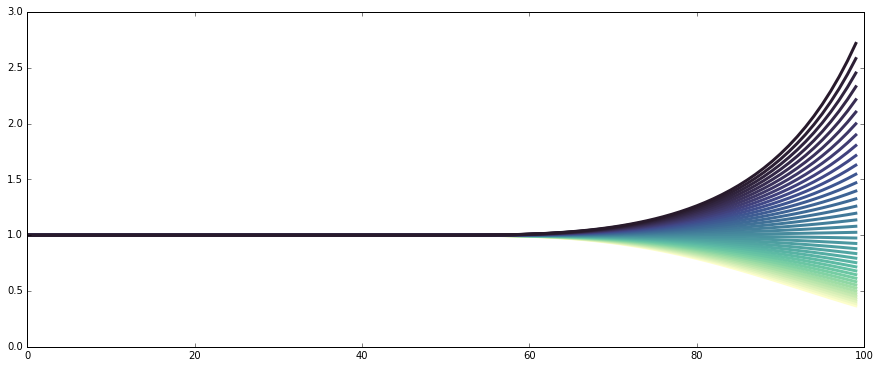

In [8]:
v = np.linspace(-1,1,40)
for i in range(len(v)):
    alpha = np.array([0, 0, 0, 0, v[i]])
    plt.plot(np.exp(np.dot(Z, alpha)), color=cmocean.cm.deep((v[i]+1)*0.5), lw=3)

# One dimensional, Zero covariance, Heteroskedastic data set

In [48]:
N_data = 10000
alpha = np.array([1.0, 2.1, -2.4, 2.5, -2.5])
x_prime = np.random.rand(N_data)

def var_of_x(x_prime, alpha):
    """ returns sigma2(x) """
    Z_prime = pt.build_design_matrices([Z.design_info], {"x": x_prime})[0]
    sigma2 = np.exp(np.dot(Z_prime, alpha))
    return sigma2

def sample_y(x_prime, alpha):
    sigma2 = var_of_x(x_prime, alpha)
    y = np.random.randn(len(x_prime)) * np.sqrt(sigma2)
    return y


sigma2_xprime = var_of_x(np.sort(x_prime), alpha)
#plt.plot(np.sort(x_prime), sigma2_xprime, "k", lw=3)

y = sample_y(x_prime, alpha)
#plt.plot(x_prime, y, 'o', color=cmocean.cm.deep(0.6), mec="k", ms=5, alpha=0.1)


# Fit the data using MLE and correctly specified model

$$
y \sim N(0, \sigma^2(x))
$$
where the variance as a function of $x$ is the spline basis function model with $\boldsymbol\alpha$ unknown
$$
\sigma^2(x) = e^{\mathbf{Z} \boldsymbol\alpha}
$$

In [49]:
import scipy as sp
import scipy.optimize
import scipy.stats

def negll(alpha_est, y, x_prime):
    sigma2 = var_of_x(x_prime, alpha_est)
    return -np.sum(sp.stats.norm.logpdf(y, loc=np.zeros(len(y)), scale=np.sqrt(sigma2)))

result = sp.optimize.minimize(negll, args=(y, x_prime), x0=np.random.randn(5), method="BFGS")
print result["message"]
alpha_mle = result["x"]
print "MLE: ", alpha_mle
print "True:", alpha

Desired error not necessarily achieved due to precision loss.
MLE:  [ 0.94133404  2.22741127 -2.40581621  2.63896353 -2.46205398]
True: [ 1.   2.1 -2.4  2.5 -2.5]


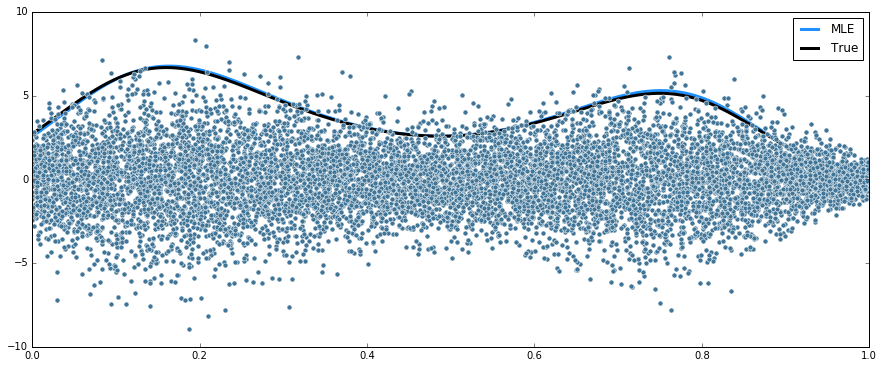

In [50]:
sigma2_mle  = var_of_x(np.sort(x_prime), alpha_mle)
sigma2_true = var_of_x(np.sort(x_prime), alpha)
plt.plot(np.sort(x_prime), sigma2_mle,  "dodgerblue", lw=3, label="MLE")
plt.plot(np.sort(x_prime), sigma2_true, "black", lw=3, label="True")

y = sample_y(x_prime, alpha)
plt.plot(x_prime, y, 'o', color=cmocean.cm.deep(0.6), mec="white", ms=5)
plt.legend()